/opt/conda/lib/python3.8/site-packages/numpy/linalg/linalg.py:2506: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/student/Projec_3/Project-3_N_drphil_mido1/functions.py:22: RuntimeWarning: invalid value encountered in true_divide
  p4 = p1 / (p2*p3)
/home/student/Projec_3/Project-3_N_drphil_mido1/functions.py:33: RuntimeWarning: invalid value encountered in true_divide
  y11 = 2*knorm*Phi/rnorm*(1 + Phi)*np.cos(psi)
/home/student/Projec_3/Project-3_N_drphil_mido1/functions.py:35: RuntimeWarning: invalid value encountered in true_divide
  y21 = knorm**2 * Phi / rnorm**2 * (1 + (3 + 4*Phi)*np.cos(psi)**2)
/home/student/Projec_3/Project-3_N_drphil_mido1/functions.py:14: RuntimeWarning: invalid value encountered in less
  phi[phi < -1] = -1


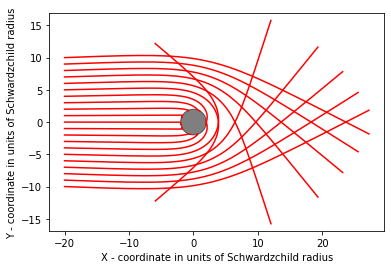

In [9]:
from functions import *
from plot_figures import *


def initialize_ray_point(r, k, light_source):
    # initial conditions for r and k, with rays coming from a source (star)
    N_r = r.shape[1]
    for i in range(N_r):
        r[0, i, :] = light_source
        k[0, i, :] = np.array([1 - 0.1*i, 0.1*i, 0])

    return (r, k)


def initialize_ray_inf(r, k):
    # initial conditions for r and k, with the rays coming from inf

    N_r = r.shape[1]
    for i in range(N_r):
        r[0, i, :] = np.array([-20, -10 + 1*i, 0])
        k[0, i, :] = np.array([1, 0, 0])

    return (r, k)


def main(M, N, N_r, h, plots):

    r_4RK = np.zeros((N, N_r, 3))
    k_4RK = np.zeros((N, N_r, 3))

    # coordinates of light_source and observer
    light_source = np.array([-5, 0, 0])
    observer = np.array([5, 0, 0])

    r_4RK, k_4RK = initialize_ray_inf(r_4RK, k_4RK)
    #r_4RK, k_4RK = initialize_ray_point(r_4RK, k_4RK, light_source)

    # use runge kutta to trace the ray
    for n in range(0, N-1):

        Phi = Phi_g(M, r_4RK[n, :, :])

        r_4RK[n+1, :, :] = rk_4step_r(gr, h, r_4RK[n, :, :], k_4RK[n, :, :], Phi)
        k_4RK[n+1, :, :] = rk_4step_k(gk, h, r_4RK[n, :, :], k_4RK[n, :, :], Phi)

    if plots == True:
        plot_rays_with_circle(r_4RK, M)

        #plot_rays_observer_star(r_4RK, M, observer, light_source)
M = 1
N = 15000
N_r = 21
h = 0.002
plots = True

main(M, N, N_r, h, plots)

In [ ]:
def initialize_ray_point(r, k, light_source):
    # initial conditions for r and k, with rays coming from a source (star)
    N_r = r.shape[1]
    for i in range(N_r):
        r[0, i, :] = light_source
        k[0, i, :] = np.array([1 - 0.1*i, 0.1*i, 0])

    return (r, k)

def main(M, N, N_r, h, plots):

    r_4RK = np.zeros((N, N_r, 3))
    k_4RK = np.zeros((N, N_r, 3))

    # coordinates of light_source and observer
    light_source = np.array([-5, 0, 0])
    observer = np.array([5, 0, 0])

    #r_4RK, k_4RK = initialize_ray_inf(r_4RK, k_4RK)
    r_4RK, k_4RK = initialize_ray_point(r_4RK, k_4RK, light_source)

    # use runge kutta to trace the ray
    for n in range(0, N-1):

        Phi = Phi_g(M, r_4RK[n, :, :])

        r_4RK[n+1, :, :] = rk_4step_r(gr, h, r_4RK[n, :, :], k_4RK[n, :, :], Phi)
        k_4RK[n+1, :, :] = rk_4step_k(gk, h, r_4RK[n, :, :], k_4RK[n, :, :], Phi)

    if plots == True:
        #plot_rays_with_circle(r_4RK, M)

        plot_rays_observer_star(r_4RK, M, observer, light_source)
M = 1
N = 12000
N_r = 10
h = 0.002
plots = True

main(M, N, N_r, h, plots)